<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass - Lab <br>(Day 2)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### About the dataset (Health Insurance Data)

The dataset contains information about 1300 individuals regarding insurance charges. The data contains an individual's basic information like age, sex, bmi, the region of residence and so on. 

Attribute Information:

**age**: Age of the individual

**gender**: Gender of the individual

**bmi**: Body mass index of the individual

**bp**: Systolic blood pressure in mm/hg

**children**: Number of children of the individual

**smoker**: Individual is smoker or not

**region**: Individual's region of residence

**medical_cost**: Individual's medical costs billed by the insurance company

##  Table of Content

1. **[Univariate Analysis](#uni)**
2. **[Multivariate Analysis](#multi)**
3. **[Handle Non-Numeric Data](#cat)**
4. **[Normalization](#norm)**
5. **[Transformation Techniques](#trans)**

**Import the required libraries**

In [ ]:
## Bivariate analysis
sns.jointplot('Income', 'Population', data = df, kind='scatter')
sns.lmplot(df.Income, df.Population, data=df, hue='Number', fit_reg=False)
sns.countplot(Category, hue = 'Number', data=df)

## Multivariate analysis
sns.pairplot(df.select_dtypes(include=[np.int, np.float]])

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Load the health insurance dataset and check the first five observations

In [2]:
# import your code here

from google.colab import files
uploaded = files.upload()

Saving health_insurance.csv to health_insurance.csv


In [3]:
df = pd.read_csv('health_insurance.csv')

In [ ]:
df.head()

,age,gender,bmi,bp,children,region,smoker,medical_cost
0,23,M,31.900,157,0,southwest,smoker,16884.92400
1,20,F,36.770,160,1,southeast,non-smoker,1725.55230
2,33,F,35.000,145,3,southeast,non-smoker,4449.46200
3,37,F,23.705,153,0,northwest,non-smoker,21984.47061
4,36,F,27.880,156,0,northwest,non-smoker,3866.85520


### Let's begin with some hands-on practice exercises

<a id="uni"> </a>
## 1. Univariate Analysis

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Are there any extreme observations present in 'bmi'? Support your answer with a plot
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

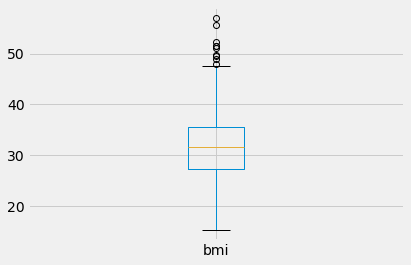

In [8]:
# import your code here
df['bmi'].plot(kind= 'box')
plt.show()


 Observation
#  So from above graph we can see that bmi looks like normally distributed. Although there are some outliers in the box.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Is the variable 'age' skewed? Support your answer with a plot and metric</b>
                </font>
            </div>
        </td>
    </tr>
</table>

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


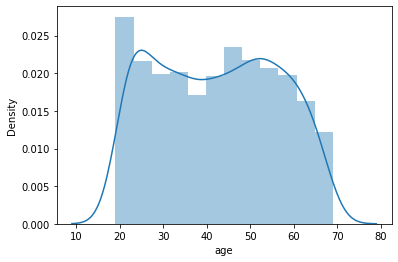

In [ ]:
# import your code here

sns.distplot(df.age)


In [15]:
s=df['age'].skew()
df['age'].value_counts()

So from above graph we can see that age is quiet normally distributed.
Age has less skewness.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. What is the probability that the individuals have charged less than 25k for medical treatment? Support your answer with the plot</b>
                </font>
            </div>
        </td>
    </tr>
</table>

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


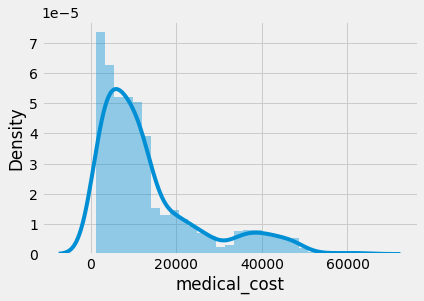

In [17]:
# import your code here
#cumulative density plot

sns.distplot(df['medical_cost'])

In [18]:

len(df.loc[df['medical_cost']<25000])/len(df['medical_cost'])

0.8523076923076923

There is a probability of 85.23%

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Draw the line for mean and median on the distribution plot and identify the type of skewness for BMI</b>
                </font>
            </div>
        </td>
    </tr>
</table>

32
32
32.0


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show>

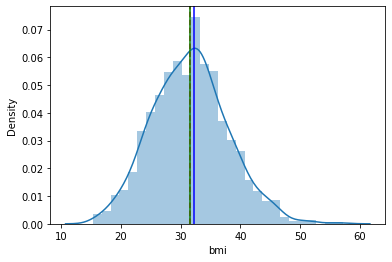

In [ ]:
# import your code here
mean=df['bmi'].mean()
median=df['bmi'].median()
mode=df['bmi'].mode()[0]
print(round(mean))
print(round(median))
print(round(mode))
sns.distplot(df["bmi"])
plt.axvline(mean, color='r', linestyle='--')
plt.axvline(median, color='g', linestyle='-')
plt.axvline(mode ,color='b', linestyle='-')
plt.show


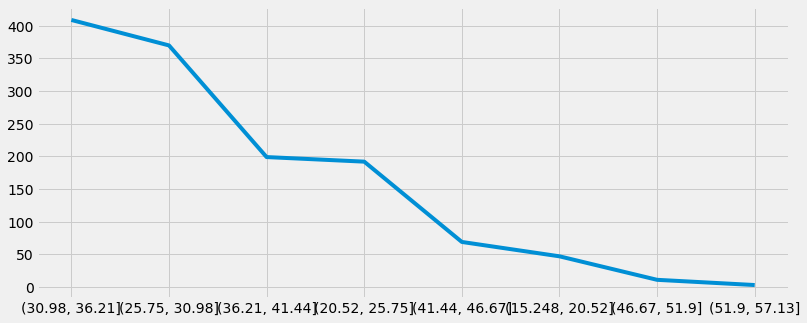

In [21]:
b=df['bmi'].skew()
a= pd.cut(df['bmi'], 8)
a.value_counts().plot(figsize=(12,5))

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Visualize the distribution of medical cost using violin plot and describe its distribution</b>
                </font>
            </div>
        </td>
    </tr>
</table>

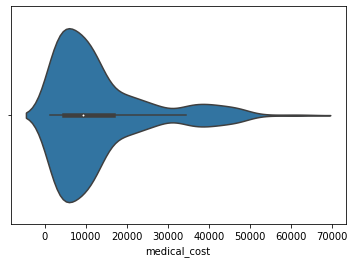

In [ ]:
# import your code here
sns.violinplot(x = df['medical_cost'])

<a id="multi"> </a>
## 2. Multivariate Analysis

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Is there any individual with age less than 30 and meadical cost greater than 40k?
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [22]:
# import your code here

df.loc[(df['age']<30) & (df['medical_cost']>= 40000)]

#yes there are people with age less than 30 and medical cost >40k

,age,gender,bmi,bp,children,region,smoker,medical_cost
254,26,F,47.54,156,2,northeast,smoker,42112.2356
1009,25,F,55.58,152,1,northeast,smoker,44501.3982
1086,26,M,41.75,152,1,northeast,smoker,40904.1995


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Does the scatter plot of BMI and medical cost reveal potential outliers?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

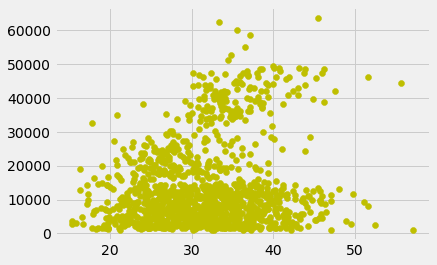

In [24]:
# import your code here

plt.scatter(x=df['bmi'], y=df['medical_cost'], color='y')

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Determine the percentage variation in BMI for males and females

</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [25]:
# import your code here
p= pd.DataFrame(df['bmi'].groupby(df['gender']).var())
p['percentage'] = p['bmi']/p['bmi'].sum()


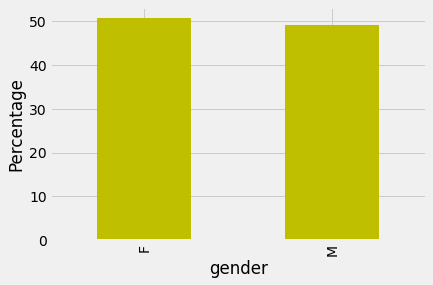

In [26]:
(p['percentage']*100).plot(kind='bar', color='y')
plt.ylabel('Percentage')
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Which region has the highest number of males?
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

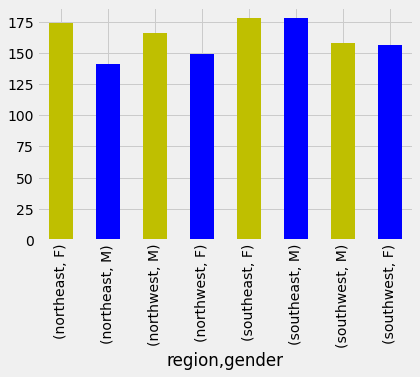

In [29]:
# import your code here
#group by

df['gender'].groupby(df['region']).value_counts().plot(kind='bar', color= ['y', 'b'])

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Analyze the pairwise relationship between the numeric variables
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

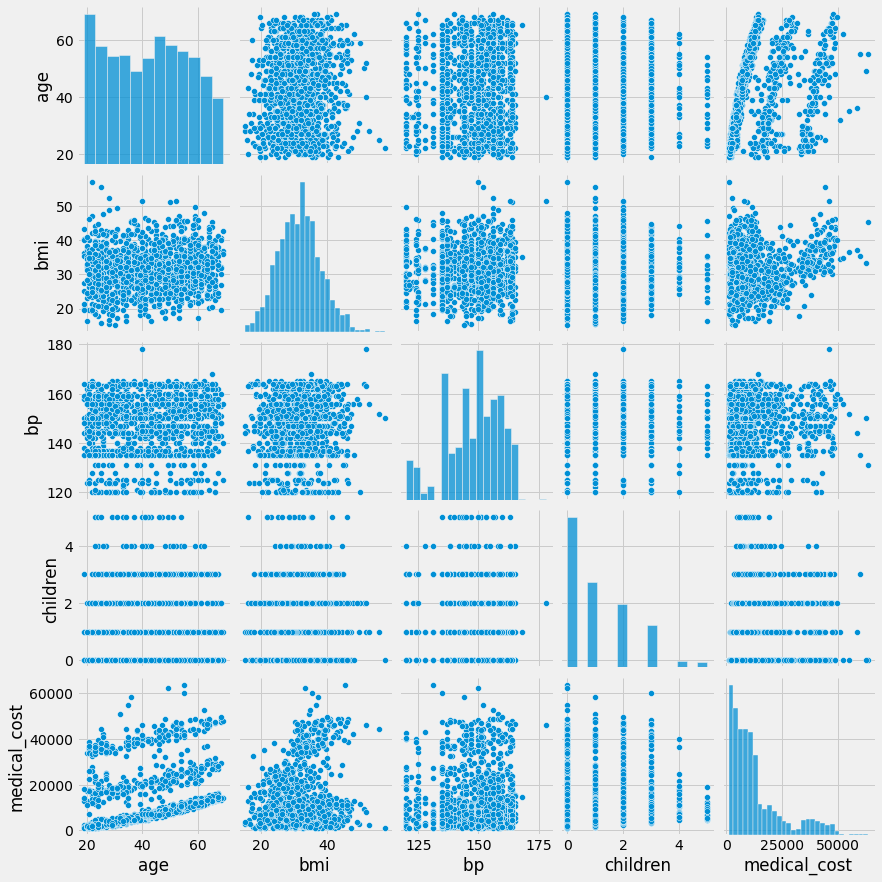

In [32]:
# import your code here

#pairplot

sns.pairplot(df.select_dtypes(include=['number']))

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>11. Are the medical costs affected by an individual's smoking habits?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [34]:
# import your code here
#scatter or box plot

df['medical_cost'].groupby([df['smoker'], df['gender']]).mean()

smoker      gender
non-smoker  F          8091.795039
            M          8783.012143
smoker      F         32824.092529
            M         30845.700025
Name: medical_cost, dtype: float64

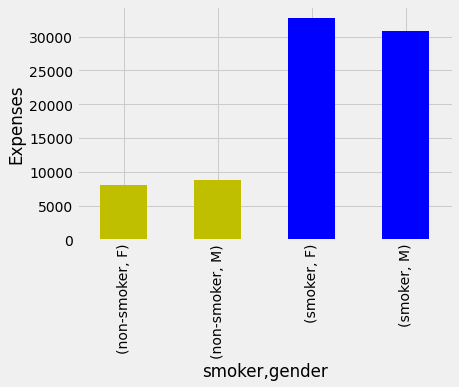

In [35]:
df['medical_cost'].groupby([df['smoker'], df['gender']]).mean().plot(kind='bar', color=['y', 'y', 'b', 'b'])
plt.ylabel('Expenses')
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Check if the region of residence and age of the individuals have an impact on the medical cost? </b>
                </font>
            </div>
        </td>
    </tr>
</table>

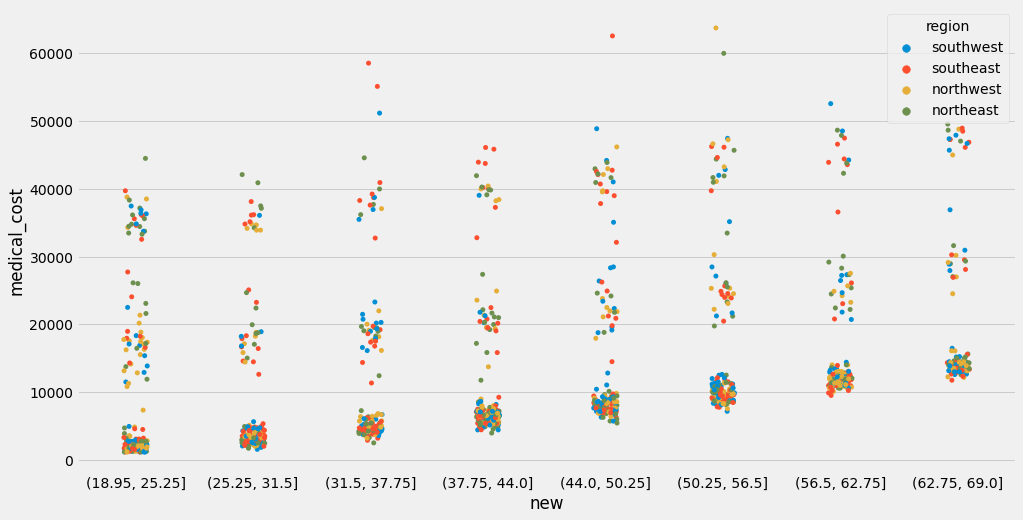

In [36]:
# import your code here
df['new']= pd.cut(df['age'],8)
fig, axes = plt.subplots(figsize=(15,8))
sns.stripplot(x='new', y='medical_cost', hue='region', data=df, ax=axes)

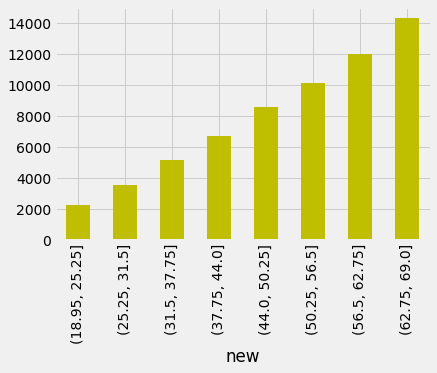

In [38]:
df['medical_cost'].groupby(df['new']).median().plot(kind='bar', color='y')

As age increases medical cost also increases

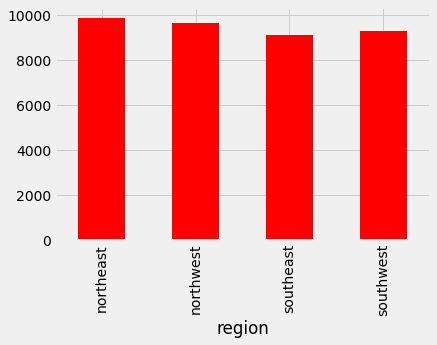

In [39]:
df['medical_cost'].groupby(df['region']).median().plot(kind='bar', color='r')

<a id="cat"> </a>
## 3. Handle Non-Numeric Data

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. Create a dummy variable for each category in 'region' 
 </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [40]:
# import your code here
#one hot encoding

pd.get_dummies(df.region)

,northeast,northwest,southeast,southwest
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
1295,0,0,0,1
1296,1,0,0,0
1297,0,0,1,0
1298,0,1,0,0


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Create a variable 'smoker_label' containing unique label for each category in the variable 'smoker'
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [42]:
# import your code here
#label encoding

df['smoker_label']=df.smoker.map({'smoker':1, 'non-smoker':0})
df.head()

,age,gender,bmi,bp,children,region,smoker,medical_cost,new,smoker_label
0,23,M,31.900,157,0,southwest,smoker,16884.92400,"(18.95, 25.25]",1
1,20,F,36.770,160,1,southeast,non-smoker,1725.55230,"(18.95, 25.25]",0
2,33,F,35.000,145,3,southeast,non-smoker,4449.46200,"(31.5, 37.75]",0
3,37,F,23.705,153,0,northwest,non-smoker,21984.47061,"(31.5, 37.75]",0
4,36,F,27.880,156,0,northwest,non-smoker,3866.85520,"(31.5, 37.75]",0


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. Create a variable which will contain the frequency of an individual's gender</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [43]:
# import your code here
#freq encoding

freq=df.gender.value_counts(normalize=True)
df['gender_freq']=df.gender.map(freq)
df.head()

,age,gender,bmi,bp,children,region,smoker,medical_cost,new,smoker_label,gender_freq
0,23,M,31.900,157,0,southwest,smoker,16884.92400,"(18.95, 25.25]",1,0.494615
1,20,F,36.770,160,1,southeast,non-smoker,1725.55230,"(18.95, 25.25]",0,0.505385
2,33,F,35.000,145,3,southeast,non-smoker,4449.46200,"(31.5, 37.75]",0,0.505385
3,37,F,23.705,153,0,northwest,non-smoker,21984.47061,"(31.5, 37.75]",0,0.505385
4,36,F,27.880,156,0,northwest,non-smoker,3866.85520,"(31.5, 37.75]",0,0.505385


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16. Create a variable such that the value '1' indicates that the individual is a smoker and '0' indicates a non-smoker</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [44]:
# import your code here label encoding use replace or map

df['var']=df.smoker.map({'smoker':1, 'non-smoker':0})
df.head()

,age,gender,bmi,bp,children,region,smoker,medical_cost,new,smoker_label,gender_freq,var
0,23,M,31.900,157,0,southwest,smoker,16884.92400,"(18.95, 25.25]",1,0.494615,1
1,20,F,36.770,160,1,southeast,non-smoker,1725.55230,"(18.95, 25.25]",0,0.505385,0
2,33,F,35.000,145,3,southeast,non-smoker,4449.46200,"(31.5, 37.75]",0,0.505385,0
3,37,F,23.705,153,0,northwest,non-smoker,21984.47061,"(31.5, 37.75]",0,0.505385,0
4,36,F,27.880,156,0,northwest,non-smoker,3866.85520,"(31.5, 37.75]",0,0.505385,0


<a id="norm"> </a>
## 4. Normalization

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. Transform BMI such that it will have mean zero and variance one</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [45]:
# import your code here
#z-score

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
s = scaler.fit_transform(df[['bmi']])
print(s)

[[ 0.05014192]
 [ 0.8165832 ]
 [ 0.53802035]
 ...
 [ 0.51441333]
 [-1.06725708]
 [ 0.23427668]]


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. Check the range of 'age' and transform the values such that the range will be 1</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [52]:
# import your code here
#min max scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

s = scaler.fit_transform(df[['age']])
s

array([[0.08],
       [0.02],
       [0.28],
       ...,
       [0.04],
       [0.06],
       [0.88]])

<a id="trans"> </a>
## 5. Transformation Techniques

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Check the skewness for 'medical_cost'. If the data is skewed, then use the appropriate technique to reduce the skewness in the data
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [53]:
# import your code here
#log or sqrt

df['log_med_cost'] = np.log(df['medical_cost'])

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Transform the 'log_medical_cost' values to the original scale and compare the 'medical_cost' and the transformed data</b>
                </font>
            </div>

</td>
    </tr>
</table>

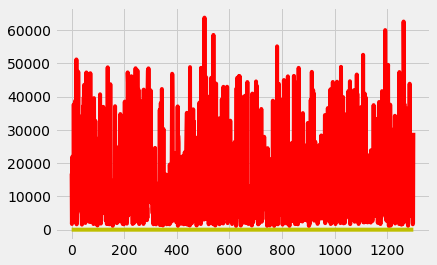

In [57]:
# import your code here np.exp  e to the power of x


df['medical_cost'].plot(color='r')
df['log_med_cost'].plot(color='y')